### III. Feature Selection, Algorithm Selection & Generalization evidence

In this part, we create a model, we try different algorithms and see which one delivers the best results. Then we chose the best algorithm and fine tune it. 

This notebook presents the following parts:

1) Model creation
* Split dataset on train and test sets, making sure that countries with duplicates are in either the train or the test set. 
* After Splitting, I deal with collinearity issues by removing columns.        

2) Algorithm testing : 
* Linear Regression 
* Boosted decision tree regressor
* Random forest regressor
* Bayesian linear regressor
3) Chosing best algorithm

4) Improving the algorithm

5) Save model

6) Verification that the **model created will generalize well** (visualizations, etc.)

In [1]:
# import libraries
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor



from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
%matplotlib inline

In [2]:
#import data set
df=pd.read_csv('dfprepared2.csv')
df.shape

(860, 39)

In [3]:
df.head(2)

,access_to_electricity,access_to_improved_sanitation,access_to_improved_water_sources,agricultural_land_area,anemia_prevalence,avg_supply_of_protein_of_animal_origin,avg_value_of_food_production,caloric_energy_from_cereals_roots_tubers,cereal_import_dependency_ratio,cereal_yield,...,rural_share,total_labor_force,total_land_area,total_population,trade_in_services,unemployment_rate,urban_share,Deacade:_2000,Deacade:_2010,prevalence_of_undernourishment
0,0.131209,0.044677,-0.534437,-0.280310,0.419850,-0.542188,0.402156,1.350589,0.166395,0.504589,...,0.603808,-0.243936,-0.209913,-0.249191,-0.54502,-1.121657,-0.684934,0,1,18.298233
1,0.557962,0.782137,0.900896,-0.299954,-0.349091,1.366352,-0.576278,-1.062279,0.950054,-0.380889,...,0.826154,-0.297878,-0.292849,-0.290334,2.30482,-1.150862,-0.834617,1,0,39.513397


In [4]:
df.columns

Index(['access_to_electricity', 'access_to_improved_sanitation',
       'access_to_improved_water_sources', 'agricultural_land_area',
       'anemia_prevalence', 'avg_supply_of_protein_of_animal_origin',
       'avg_value_of_food_production',
       'caloric_energy_from_cereals_roots_tubers',
       'cereal_import_dependency_ratio', 'cereal_yield', 'co2_emissions',
       'country_code', 'fertility_rate',
       'food_imports_as_share_of_merch_exports', 'forest_area',
       'gross_domestic_product_per_capita_ppp',
       'imports_of_goods_and_services', 'life_expectancy',
       'military_expenditure_share_gdp', 'net_oda_received_per_capita',
       'net_oda_received_percent_gni', 'obesity_prevalence', 'open_defecation',
       'per_capita_food_production_variability',
       'per_capita_food_supply_variability',
       'percentage_of_arable_land_equipped_for_irrigation',
       'political_stability', 'population_growth',
       'proportion_of_seats_held_by_women_in_gov', 'rural_share

In [5]:
df.shape

(860, 39)

### 1. Model Creation

Here it is very important to know what I am doing. 

Given the number of countries are limited 92, and they are not the same in the train as in the test data. 

When doing the local train/test split, it is imperative that I split the data by country so that all years of data for a country appear either in the train set or the test set, but are not split across both.

The country codes in the test set are distinct from those in the train set. In other words, no country that appears in the train set appears in the test set. Thus, country-specific features (i.e. country dummy variables) will not be an option. However, the countries in the test set still share similar patterns as those in the train set and so other feature engineering will work the same as usual.

Consequently, I proceed as follows:

* Identify unique country codes
* Split train and test data:
        - Train data will have some country codes
        - Test data will have the other country codes
        - Drop the country_code column from both train and test data

In [6]:
df.country_code.unique()

array(['9e614ab', '100c476', '4609682', '7e222a7', '583201c', '2ddc563',
       'b79b5f9', 'c408d26', 'e256731', 'a0b37e7', 'd090b87', '6966b4a',
       'e509cda', '04952a0', '893d538', 'c8e4701', 'f405b98', '10aeba6',
       '0b6e276', '2e5e810', 'ba2039a', '6303e84', '71dc81f', 'd680446',
       '75c02b8', 'c3782c8', '81e884c', '5f1162c', 'e8739c8', '085807f',
       'c3668f5', '9621c07', '0845041', 'ee5721a', '30e2302', '6b615ad',
       'e15a18a', '7fb4d17', '0c0177b', '8e8dfae', 'ba8e2c5', '5c83a63',
       '611025c', '1881055', 'ea0b937', '889f053', '2f1d47e', '679c02d',
       'c9d2604', '22b9653', '42c298b', '6e49e65', 'a7d355b', 'ea3bfc2',
       '94e6bd5', '07f8d11', '066b021', '3e049d7', '75e8f46', '99a7c06',
       '9e79f12', '12c8f8f', '8fb5447', '2ca26c6', '11c9833', '7328d3f',
       '45a15a2', '66b86bf', '0593aa0', '508731a', 'be60011', '5dbddf9',
       'efa9150', 'e8bfe1e', '5c2e474', 'b3dfc85'], dtype=object)

In [7]:
#To select rows whose column value is in an iterable array, which we'll define as array, you can use isin:
array = ['889f053', '9e614ab', '100c476', '4609682', 'be2a7f5', '7e222a7',
       '066b021', '66b86bf', '583201c', '0ea781c', '2ddc563', 'b79b5f9',
       'f787860', '4080343', 'c408d26', 'e256731', '99a7c06', 'a0b37e7',
       'd090b87', '6966b4a', '79c89fd', '12c8f8f', '3e049d7', 'e509cda',
       'abd1492', '04952a0', '5dbddf9', '893d538', 'd3a0eeb', 'c8e4701',
       'f405b98', '5c2e474', '10aeba6', '0b6e276', '2e5e810', '0593aa0',
       'ed9ad13', 'ba2039a', '6303e84', '71dc81f', 'd680446', '11c9833',
       '75c02b8', 'c3782c8', '81e884c', '5f1162c', 'e8739c8', '085807f',
       'ba8e2c5', 'cff4c58', 'c3668f5', 'e8bfe1e', '9621c07', '93d74a6',
       '0845041', 'dd64913', '9e79f12', 'ee5721a', '30e2302', '6b615ad',
       'e15a18a', '7fb4d17', '0c0177b', '8fb5447', ]
train = df.loc[df['country_code'].isin(array)]
train.shape

(604, 39)

In [8]:
# for test values, we shall use the sing ~ to select those country codes NOT IN array
test = df.loc[~df['country_code'].isin(array)]
test.shape

(256, 39)

In [9]:
#Now I can delete the country_code column from train and test:
train= train.drop(['country_code'], axis = 1)
test= test.drop(['country_code'], axis = 1)

In [10]:
X_train = train.loc[:, train.columns != 'prevalence_of_undernourishment']
X_test = test.loc[:, test.columns != 'prevalence_of_undernourishment']
y_train = train['prevalence_of_undernourishment']
y_test = test['prevalence_of_undernourishment']

### 1.1 Feature Selection
For this, I shall use basic filter methods and by Random Forest Importance

In [11]:
# Remove Constant Features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

/anaconda3/envs/featsel/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


((604, 37), (256, 37))

Two features have been removed

In [12]:
# remove quasi-constant features
sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

sum(sel.get_support()) # how many not quasi-constant?

37

None has been removed

In [13]:
features_to_keep = X_train.columns[sel.get_support()]

In [14]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((604, 37), (256, 37))

In [15]:
# sklearn transformations lead to numpy arrays
# here I transform the arrays back to dataframes
# please be mindful of getting the columns assigned
# correctly

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [16]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30


0

In [17]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((604, 37), (256, 37))

In [18]:
# I keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

In [19]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  8


In [20]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((604, 29), (256, 29))

In [21]:
# here I will do the model fitting and feature selection
# altogether in one line of code

# first I specify the Random Forest instance, indicating
# the number of trees (the default value in sklearn is 10

# Then I use the selectFromModel object from sklearn
# to automatically select the features

# SelectFrom model will select those features which importance
# is greater than the mean importance of all the features
# by default, but you can alter this threshold if you want to

sel_ = SelectFromModel(RandomForestRegressor(n_estimators=100))
sel_.fit(X_train.fillna(0), y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, th

In [22]:
# let's make a list and count the selected features
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

8

In [23]:
# and now, let's compare the  amount of selected features
# with the amount of features which importance is above the
# mean importance, to make sure we understand the output of
# sklearn

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients greater than the mean coefficient: {}'.format(
    np.sum(sel_.estimator_.feature_importances_ > sel_.estimator_.feature_importances_.mean())))

total features: 29
selected features: 8
features with coefficients greater than the mean coefficient: 8


### 2. Algorithm Testing

#### 2.1 Linear Regression 

##### 2.1.1 Linear Regression simple

In [24]:
#Train the Model and predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()
lm.fit(X_train[selected_feat],y_train)
lm_predictions = lm.predict(X_test[selected_feat])

In [25]:
#print RMSLE
print ('Simple Regression RMSE is', np.sqrt(mean_squared_error(y_test, lm_predictions)))


Simple Regression RMSE is 6.624624032953753


##### 2.1.2 Linear Lasso

In [26]:
#Train the Model and predict
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_log_error
Lasso = Lasso()
Lasso.fit(X_train[selected_feat],y_train)
Lasso_predictions = Lasso.predict(X_test[selected_feat])

In [27]:
#print RMSLE
print ('Lasso Regression RMSLE is', np.sqrt(mean_squared_error(y_test, Lasso_predictions)))

Lasso Regression RMSLE is 6.4499067897095435


##### 2.1.1 Linear Ridge

In [28]:
#Train the Model and predict
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error
Ridge = Ridge()
Ridge.fit(X_train[selected_feat],y_train)
Ridge_predictions = Ridge.predict(X_test[selected_feat])

In [29]:
#print RMSLE
print ('Ridge Regression RMSLE is', np.sqrt(mean_squared_error(y_test, Ridge_predictions)))

Ridge Regression RMSLE is 6.600537218533662


2.2 Algorithm: **Boosted Decision Tree Regressor**

In [30]:
#Train the Model and predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
Tree = DecisionTreeRegressor()
Tree.fit(X_train[selected_feat],y_train)
Tree_predictions = Tree.predict(X_test[selected_feat])

In [31]:
#print RMSLE
print ('Boosted Decision Tree Regression RMSE is', np.sqrt(mean_squared_error(y_test, Tree_predictions)))

Boosted Decision Tree Regression RMSE is 9.454909142275802


2.3 Algorithm: **Random Forest Regressor**

In [32]:
#Train the Model and predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
Forest = RandomForestRegressor()
Forest.fit(X_train[selected_feat],y_train)
Forest_predictions = Forest.predict(X_test[selected_feat])

/anaconda3/envs/featsel/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
#print RMSLE
print ('Random Forest Regression RMSE is', np.sqrt(mean_squared_error(y_test, Forest_predictions)))

Random Forest Regression RMSE is 6.624200552800544


2.4 Algorithm: **Bayesian Linear Regressor**

In [34]:
#Train the Model and predict
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
Bayesian = BayesianRidge()
Bayesian.fit(X_train[selected_feat],y_train)
Bayesian_predictions = Bayesian.predict(X_test[selected_feat])

In [35]:
#print RMSLE
print ('Bayesian Ridge Regression RMSE is', np.sqrt(mean_squared_error(y_test, Bayesian_predictions)))

Bayesian Ridge Regression RMSE is 6.467279187853804


2.5 Algorithm **XGBoost Regressor**

In [36]:
import xgboost as xgb

# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model using all the features
xgbregressor = xgb.XGBRegressor(
    nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)

xgbregressor.fit(X_train[selected_feat], y_train)
xgbregressor_predictions=xgbregressor.predict(X_test[selected_feat])

/anaconda3/envs/featsel/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/envs/featsel/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


### 3. Compare and chose best model

In [37]:
print ('Simple Regression RMSE is', np.sqrt(mean_squared_error(y_test, lm_predictions)))
print ('Lasso Regression RMSLE is', np.sqrt(mean_squared_error(y_test, Lasso_predictions)))
print ('Ridge Regression RMSLE is', np.sqrt(mean_squared_error(y_test, Ridge_predictions)))
print ('Boosted Decision Tree Regression RMSE is', np.sqrt(mean_squared_error(y_test, Tree_predictions)))
print ('Random Forest Regression RMSE is', np.sqrt(mean_squared_error(y_test, Forest_predictions)))
print ('Bayesian Ridge Regression RMSE is', np.sqrt(mean_squared_error(y_test, Bayesian_predictions)))
print ('XGB Regressor RMSE is', np.sqrt(mean_squared_error(y_test, Bayesian_predictions)))

Simple Regression RMSE is 6.624624032953753
Lasso Regression RMSLE is 6.4499067897095435
Ridge Regression RMSLE is 6.600537218533662
Boosted Decision Tree Regression RMSE is 9.454909142275802
Random Forest Regression RMSE is 6.624200552800544
Bayesian Ridge Regression RMSE is 6.467279187853804
XGB Regressor RMSE is 6.467279187853804


Clearly, **LASSO REGRESSION** is the one producing the best results

## 5. Save the model for future predictions

In [38]:
# Saving LogRec model
from sklearn.externals import joblib
from joblib import dump, load

/anaconda3/envs/featsel/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [39]:
dump(Lasso,'Lasso.joblib') 

['Lasso.joblib']

## 6. Verification that the model created will generalize well

In [41]:
def print_metrics(y_train, y_test, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_train, y_test)
    r2_adj = r2 - (n_parameters - 1)/(y_train.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_train, y_test)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_test))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_train, y_test)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_train, y_test)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = Lasso.predict(X_test[selected_feat]) 
print_metrics(y_test, y_score, 40)

Mean Square Error      = 41.60129759594127
Root Mean Square Error = 6.4499067897095435
Mean Absolute Error    = 5.501970946935012
Median Absolute Error  = 5.36942108908646
R^2                    = 0.45063224852975603
Adjusted R^2           = 0.3514408489587397


In [42]:
#Lets look at the residuals plot 

## Calculate residuals (y-yhat)
df['residuals']=y_train - y_test

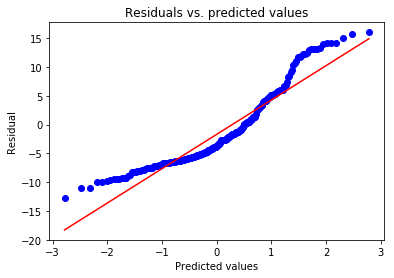

In [43]:
def resid_qq(y_train, y_test):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    ss.probplot(resids, plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_train, y_test)   

As with the histogram, the Q-Q Normal plot indicates the residuals are close to Normally distributed, show some skew (deviation from the straight line). This is particularly for large residuals.

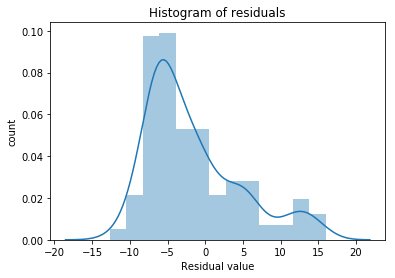

In [44]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 

This plot looks reasonable. The residual values are distributed near both sides of 0.

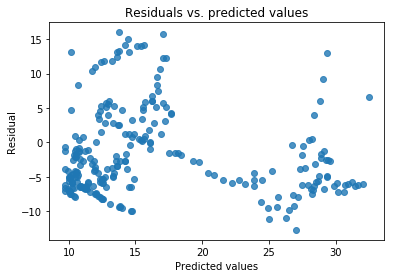

In [45]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score)

As expected, when plotting residuals we cannot see any clear pattern. Otherwise it would mean there is a hidden pattern we could not identify.

We can see, however, some outliers mainly positive.

### 6. Oportunity for improvement

Clearly, an opportunity for improvement would be to deal with outliers. 

Look at all the country codes one by one, and search for irregularities. 

This project was part of a competition, in which my result scored 17th best on the competiton. Later, with time, I could work and improve the results, matching the best algorithm results. See [here]( https://datasciencecapstone.org/competitions/9/predicting-chronic-hunger/leaderboard/)